# Lightning Round Review
---
1. Bonds define material behaviors
2. The nature of the atoms involed define the bonds
3. Because want to be at a fixed distance while obeying directional impositions of orbitals (if any) they tend to form lattices with symmetry. There are 230 space groups.
4. Xrays fit nicely between atoms while also scattering nicely off an atom and are useful for probing crystal structure.


# Using X-Rays To Determine Structure
---
## Structure Factor Review

The structure factor relationship

$$F_{\text{hkl}} = \sum_{n=1}^N f_n exp(2\pi i (hu_n+kv_n+lw_n))$$

applies to _any_ of the 230 space groups. 

### FCC

FCC can be considered of the form A where

$$F_{\text{hkl}} = \sum_{n=1}^N f_n \exp(2\pi i (hu_n+kv_n+lw_n))$$

$$u_A=0,v_A=0,w_A=0$$

$$u_B=\frac{1}{2},v_B=\frac{1}{2},w_B=0$$

$$u_C=0,v_C=\frac{1}{2},w_C=\frac{1}{2}$$

$$u_D=\frac{1}{2},v_C=0,w_C=\frac{1}{2}$$



$$F= f [\exp(2\pi i(0))+ \exp(2\pi i (\frac{h}{2}+\frac{k}{2}+0)) + \exp(2\pi i (\frac{h}{2}+0+\frac{l}{2})) + \exp(2\pi i (0+\frac{k}{2}+\frac{l}{2}))]$$

$$F= f [1+ \exp(\pi i (h+k)+\exp(\pi i (k+l)+\exp(\pi i (h+l)]$$


so if 
- $h,k,l=\text{all even all odd}$ we should get a peak (4f)
- $h+k=\text{mixed}$ we should not get a peak (0)

## Jason's Question

So what was this Ni FCC pattern indexed like this?


<img src="https://drops.steingart.princeton.edu/MSE501_Fall_2017/Images/Lecture04/Ni_back.png">

from [doi: 10.1149/2.037403jes](http://jes.ecsdl.org/content/161/3/A275.abstract)



### BCC

BCC can be considered of the form A,B where A = [0 0 0] and B = [1/2 1/2 1/2], so for any rotation we can say that

$$F_{\text{hkl}} = \sum_{n=1}^N f_n \exp(2\pi i (hu_n+kv_n+lw_n))$$

$$u_1=0,v_1=0,w_1=0$$

$$u_2=\frac{1}{2},v_2=\frac{1}{2},w_2=\frac{1}{2}$$

$$F= f [\exp(2\pi i(0))+ \exp(2\pi i (\frac{h}{2}+\frac{k}{2}+\frac{l}{2}))]$$

$$F= f [1+ \exp(\pi i (h+k+l)]$$


so if 
- $h+k+l=\text{even}$ we should get a peak
- $h+k+l=\text{odd}$ we should not get a peak



### Simple Cubic


$$F_{\text{hkl}} = \sum_{n=1}^N f_n \exp(2\pi i (hu_n+kv_n+lw_n))$$

$$u_1=0,v_1=0,w_1=0$$

$$u_2=1,v_2=0,w_2=0$$

$$F= f [\exp(2\pi i(0))+ \exp(2\pi i h)]$$

$$F= f [1+ \exp(\pi i (2h)]$$

2 times _anything_ is even, so.....






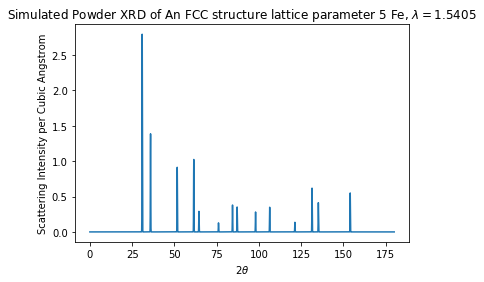

In [32]:
import sys

sys.path.append("/pithy/code")
sys.path.append("/pithy/files/pylattice")

#import above
from pithy import *
from lattice import *
import libruff
#jupyter magic call
%matplotlib inline


#Try to make our own fcc lattice
parameter = 5

v1 = parameter*array([0,.5,.5]) 
v2 = parameter*array([.5,0,.5])
v3 = parameter*array([.5,.5,0])

lattice = Lattice(v1,v2,v3)
basis = Basis([('Fe',[0,0,0])], l_const=parameter)
crystal = lattice + basis

scattering_data = powder_XRD(crystal, 1.5405)
angles, values = spectrumify(scattering_data)
plot(angles, values)

    
title(r'Simulated Powder XRD of An FCC structure lattice parameter 5 Fe, $\lambda = 1.5405$')
xlabel(r'$2\theta$')
ylabel(r'Scattering Intensity per Cubic Angstrom')
show()




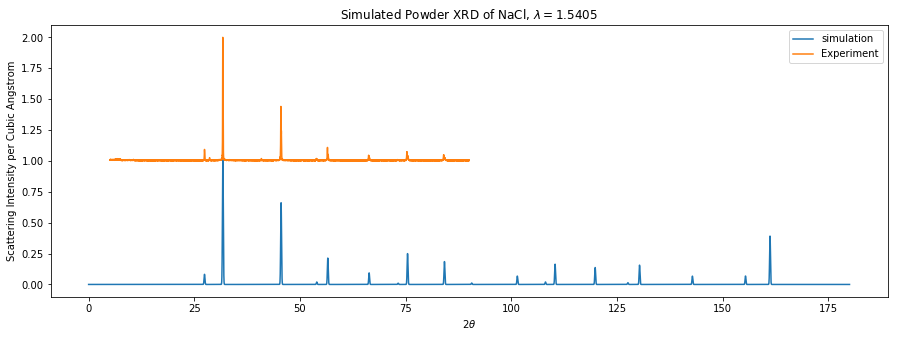

In [21]:
parameter =  5.63
#make an FCC lattice
v1 = parameter*array([0,.5,.5]) 
v2 = parameter*array([.5,0,.5])
v3 = parameter*array([.5,.5,0])
lattice = Lattice(v1,v2,v3)

#set the NaCl basis
basis = Basis([('Cl',[0,0,0]),
               ('Na',[0.5,0.5,0.5])],
              l_const=parameter)

#make crystal
crystal = lattice + basis

# Plot a simulated XRD with copper radiation

figure(figsize=(15,5))
scattering_data = powder_XRD(crystal, 1.5405)
angles, values = spectrumify(scattering_data)
plot(angles, values,label='simulation')

# Get real salt from database
rd = libruff.get("Halite__R070292-1__Powder__Xray_Data_XY_RAW__8525") #
angles = rd['CELL PARAMETERS']['theta']
values = rd['CELL PARAMETERS']['counts']
values = values/max(values) +1 #normalized data
plot(angles,values,label="Experiment")


# Add some more info to the plot
title(r'Simulated Powder XRD of NaCl, $\lambda = 1.5405$')
xlabel(r'$2\theta$')
ylabel(r'Scattering Intensity per Cubic Angstrom')
legend()
show()



### Can we determine a structure factor for diamond?

At it's core it is fcc, so,

we have atoms at `[0.5,0.5,0.5]`, but the difference is that diamond has 1/2 of it's tetrahedral interstitials occupied, so `[0.25,0.25,0.25]`, and permutations thereof, need to be considered.

So we can take the structure factor for FCC, 

$$F_{\text{FCC}}= f [1+ \exp(\pi i (h+k)+\exp(\pi i (k+l)+\exp(\pi i (h+l)]$$

$$F_{\text{Diamond}} = F_{\text{FCC}} + f e^{\pi i (h+k+l)}[[1+ \exp(\pi i (h+k)+\exp(\pi i (k+l)+\exp(\pi i (h+l)]]$$

So if h,k,l are even and h+k+l/4 is an integer.  Should this be more or fewer peaks than FCC?

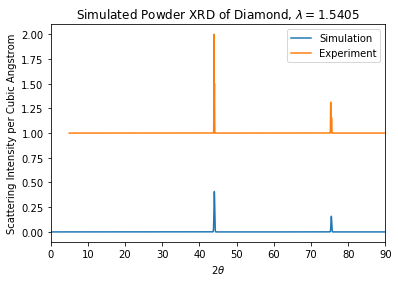

In [27]:
##Let's Try Diamond

l_cu = 1.5405

#Set up an FCC lattice
a_Diamond = 3.5597
v1 = a_Diamond*array([0,.5,.5]) 
v2 = a_Diamond*array([.5,0,.5])
v3 = a_Diamond*array([.5,.5,0])
lattice = Lattice(v1,v2,v3)

#Set Up Basis
#
basis = Basis([('C',[0,0,0]),('C',[0.25,0.25,0.25])],l_const=a_Diamond)

#Make Crystal
crystal = lattice + basis

#Plot a simulated XRD with copper
scattering_data = powder_XRD(crystal,1.5405)
angles, values = spectrumify(scattering_data)

plot(angles,values,label="Simulation")

# Get real salt from database
rd = libruff.get("Diamond__R050207-9__Powder__Xray_Data_XY_Processed__7229") #
angles = rd['CELL PARAMETERS']['theta']
values = rd['CELL PARAMETERS']['counts']
values = values/max(values) +1 #normalized data
plot(angles,values,label="Experiment")




# Add some more info to the plot
title(r'Simulated Powder XRD of Diamond, $\lambda = 1.5405$')
xlabel(r'$2\theta$')
ylabel(r'Scattering Intensity per Cubic Angstrom')
xlim(0,max(angles))
legend()
show()





## Methodology for manually indexing

An unknown sample has peaks at the following $2\theta$, found using a copper source.

 ```
 28.4340 
 47.3030 
 56.1284 
 69.1337 
 76.3758 
 88.0425 ```

I'm hinting that it's cubic, (and just start here b/c it's easy)

$$\sin^2 (\theta) = \lambda^2\frac{h^2+k^2+l^2}{4a^2}$$

$h^2+k^2+l^2$ must be an integer number


$$\frac{\sin^2 (\theta) 4a^2}{\lambda^2} = h^2+k^2+l^2$$

So, we have effectively more unknowns than equations, so we have to guess and check



In [57]:
arr =  array([28.4340,47.3030,56.1284,69.1337,76.3758,88.0425])

#conver to radians
arr = arr/57.2958

for a in arr: print '2theta=',a,'sin^2(theta)=',sin(a/2)**2

#try normalizing to first peak....

conv = sin(arr/2)**2

conv = conv/conv[0] #ratio of the different peaks
print conv


2theta= 0.496266742065 sin^2(theta)= 0.060316869296
2theta= 0.825592800868 sin^2(theta)= 0.16093929707
2theta= 0.979625033598 sin^2(theta)= 0.221333041894
2theta= 1.20661025765 sin^2(theta)= 0.321905567912
2theta= 1.33300870221 sin^2(theta)= 0.382223458902
2theta= 1.53663095724 sin^2(theta)= 0.482920638388
[ 1.          2.66823028  3.66950481  5.33690776  6.3369247   8.0063943 ]


Not great yet, so let's multiply

In [68]:
for i in conv: print i *3,

3.0 8.00469084099 11.0085144244 16.0107232853 19.0107741016 24.0191828932


this we can work with, 

- $1^2+1^2+1^2 = 3$  All odd
- $2^2+2^2+0^2 = 8$  All even
- $3^2+1^2+1^2 = 11$ All odd
- $4^2+0^2+0^2 = 16$ All even
- $3^2+3^2+1^2 = 19$ All odd
- $4^2+2^2+2^2 = 24$ All odd

this seems to be fcc. let's test



In [69]:
l_cu = 1.5405 #our copper source

miller = [[1,1,1],[2,2,0],[3,1,1],[4,0,0],[3,3,1],[4,2,2]]  #our available peaks

for i in range(len(miller)): #sweep the range
    theta = arr[i]/2 #match theta
    summer = 0
    for j in miller[i]:
        summer += j**2
    a = sqrt(l_cu**2*(summer)/(4*sin(theta)**2))

    print a
    

5.43216481852
5.43057292971
5.43006368562
5.4303454001
5.43062529703
5.42999518911


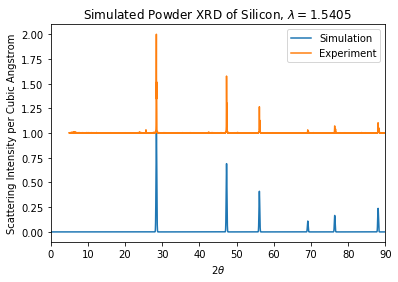

In [70]:
param = a
lattice = FCC(a)
basis = Basis([('Siv',[0,0,0]),('Siv',[0.25,0.25,0.25])],l_const=a)
crystal = lattice + basis

# Plot a simulated XRD with copper radiation
scattering_data = powder_XRD(crystal, 1.5405)
angles, values = spectrumify(scattering_data)

plot(angles,values,label="Simulation")

#Silicon__R050145-1__Powder__Xray_Data_XY_Processed__4415
rd = libruff.get("Silicon__R050145-1__Powder__Xray_Data_XY_Processed__4415") #
angles = rd['CELL PARAMETERS']['theta']
values = rd['CELL PARAMETERS']['counts']
values = values/max(values) +1 #normalized data
plot(angles,values,label="Experiment")


# Add some more info to the plot
title(r'Simulated Powder XRD of Silicon, $\lambda = 1.5405$')
xlabel(r'$2\theta$')
ylabel(r'Scattering Intensity per Cubic Angstrom')
xlim(0,max(angles))
legend()
show()



## Chung 2002

What are they claiming?

Why are they claiming it?

Based on the paper and what we know about XRD, what do we think about the claim?

What is the challenge brought by the follow up piece?

